Summary of study results

After completing the data analysis of the Pymaceuticals Inc data i noticed a few things.
    
    1. The tumor volume average for both Capomulin and Ramicane were both at about 40.
    2. Looking at the time point versus tumor volume for a mouse treated with Capomulin we see the decrease
        of tumor volume over time. 
    3. The hevier the mouse in (g), the larger the tumor was.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "Data/Mouse_metadata.csv"
study_results = "Data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

average = combined_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = combined_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variance = combined_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
std = combined_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sem = combined_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
stats_table = pd.DataFrame({"Average":average,"Median":median, "Variance":variance,
                            "Standard Deviation":std, "SEM":sem})
stats_table



,Average,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Number of Data Points')

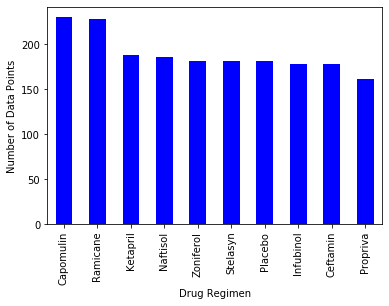

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
count = combined_df['Drug Regimen'].value_counts()
axis = count.plot(kind='bar', color= 'blue')
axis.set_xlabel('Drug Regimen')
axis.set_ylabel('Number of Data Points')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

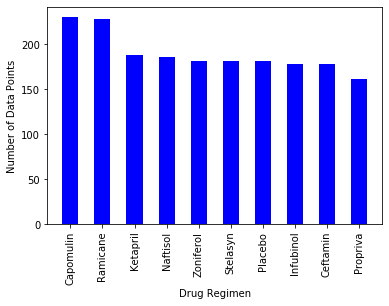

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
values = combined_df['Drug Regimen'].value_counts()
labels = values.index
plt.bar(labels, values, color = 'blue', align="center", width=.50)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=90)

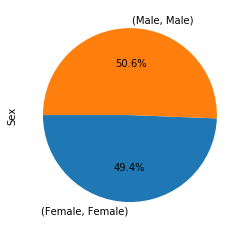

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = combined_df.groupby('Sex')
gender_count = gender_group['Sex'].value_counts()


#Generate pie plot using pandas
chart = gender_count.plot(kind='pie', startangle=180, autopct='%1.1f%%')


([<matplotlib.patches.Wedge at 0x1a181d0510>,
 [Text(-0.020992503472586185, -1.0997996703027118, 'Female'),
  Text(0.02099250347258632, 1.0997996703027118, 'Male')],
 [Text(-0.011450456439592464, -0.5998907292560246, '49.4%'),
  Text(0.011450456439592537, 0.5998907292560246, '50.6%')])

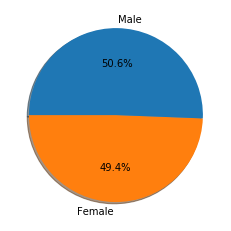

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_group = combined_df.groupby('Sex')
gender_count = gender_group['Sex'].value_counts()


colors = ["tab:orange", "tab:blue"]
explode = (0,0)
genders = ["Female", "Male"]

#Generate pie plot using 
plt.pie(gender_count, explode=explode, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)


In [7]:
#Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
#Calculate the IQR and quantitatively determine if there are any potential outliers.

#Get the last Timepoint of tumor for Capomulin Regimen
Cap_reg = combined_df.loc[combined_df["Drug Regimen"] == "Capomulin", :]
Cap_max = Cap_reg.groupby('Mouse ID').max()['Timepoint']
Cap_volume = pd.DataFrame(Cap_max)
Cap_merge = pd.merge(Cap_volume, combined_df, on=('Mouse ID','Timepoint'),how="left")
Cap_tv = Cap_merge['Tumor Volume (mm3)']

# Calculate Quartiles Lower, Upper and IQR for Capomulin
Cap_quartiles = Cap_tv.quantile([.25,.5,.75])
Cap_lowerq = Cap_quartiles[0.25]
Cap_upperq = Cap_quartiles[0.75]
Cap_iqr = Cap_upperq-Cap_lowerq

Cap_lower_bound = Cap_lowerq - (1.5*Cap_iqr)
Cap_upper_bound = Cap_upperq + (1.5*Cap_iqr)

print(f"Capomulin Values below {Cap_lower_bound} and above {Cap_upper_bound} could be outliers. IQR if {Cap_iqr}")


Capomulin Values below 20.70456164999999 and above 51.83201549 could be outliers. IQR if 7.781863460000004


In [8]:
#Get the last Timepoint of tumor for Ramicane Regimen
Ram_reg = combined_df.loc[combined_df["Drug Regimen"] == "Ramicane", :]
Ram_max = Ram_reg.groupby('Mouse ID').max()['Timepoint']
Ram_volume = pd.DataFrame(Ram_max)
Ram_merge = pd.merge(Ram_volume, combined_df, on=('Mouse ID','Timepoint'),how="left")
Ram_tv = Ram_merge['Tumor Volume (mm3)']

# Calculate Quartiles Lower, Upper and IQR for Ramicane
Ram_quartiles = Ram_tv.quantile([.25,.5,.75])
Ram_lowerq = Ram_quartiles[0.25]
Ram_upperq = Ram_quartiles[0.75]
Ram_iqr = Ram_upperq-Ram_lowerq

Ram_lower_bound = Ram_lowerq - (1.5*Ram_iqr)
Ram_upper_bound = Ram_upperq + (1.5*Ram_iqr)

print(f"Ramicane Values below {Ram_lower_bound} and above {Ram_upper_bound} could be outliers. IQR if {Ram_iqr}")

Ramicane Values below 17.912664470000003 and above 54.30681135 could be outliers. IQR if 9.098536719999998


In [9]:
#Get the last Timepoint of tumor for Infubinol Regimen
Inf_reg = combined_df.loc[combined_df["Drug Regimen"] == "Infubinol", :]
Inf_max = Inf_reg.groupby('Mouse ID').max()['Timepoint']
Inf_volume = pd.DataFrame(Inf_max)
Inf_merge = pd.merge(Inf_volume, combined_df, on=('Mouse ID','Timepoint'),how="left")
Inf_tv = Inf_merge['Tumor Volume (mm3)']

# Calculate Quartiles Lower, Upper and IQR for Infubinol
Inf_quartiles = Inf_tv.quantile([.25,.5,.75])
Inf_lowerq = Inf_quartiles[0.25]
Inf_upperq = Inf_quartiles[0.75]
Inf_iqr = Inf_upperq-Inf_lowerq

Inf_lower_bound = Inf_lowerq - (1.5*Inf_iqr)
Inf_upper_bound = Inf_upperq + (1.5*Inf_iqr)

print(f"Infubinol Values below {Inf_lower_bound} and above {Inf_upper_bound} could be outliers. IQR if {Inf_iqr}")

Infubinol Values below 36.83290494999999 and above 82.74144559000001 could be outliers. IQR if 11.477135160000003


In [10]:
#Get the last Timepoint of tumor for Ceftamin Regimen
Cef_reg = combined_df.loc[combined_df["Drug Regimen"] == "Ceftamin", :]
Cef_max = Cef_reg.groupby('Mouse ID').max()['Timepoint']
Cef_volume = pd.DataFrame(Cef_max)
Cef_merge = pd.merge(Cef_volume, combined_df, on=('Mouse ID','Timepoint'),how="left")
Cef_tv = Cef_merge['Tumor Volume (mm3)']

# Calculate Quartiles Lower, Upper and IQR for Ceftamin
Cef_quartiles = Cef_tv.quantile([.25,.5,.75])
Cef_lowerq = Cef_quartiles[0.25]
Cef_upperq = Cef_quartiles[0.75]
Cef_iqr = Cef_upperq-Cef_lowerq

Cef_lower_bound = Cef_lowerq - (1.5*Cef_iqr)
Cef_upper_bound = Cef_upperq + (1.5*Cef_iqr)

print(f"Ceftamin Values below {Cef_lower_bound} and above {Cef_upper_bound} could be outliers. IQR if {Cef_iqr}")

Ceftamin Values below 25.355449580000002 and above 87.66645829999999 could be outliers. IQR if 15.577752179999997


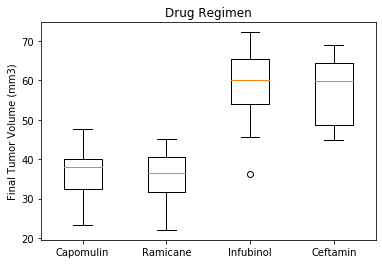

In [11]:
#Combine all 4 regimens last Tumor Volume to be able to plot
all_regimen = [Cap_tv, Ram_tv, Inf_tv, Cef_tv]

fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(all_regimen, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])
plt.show()

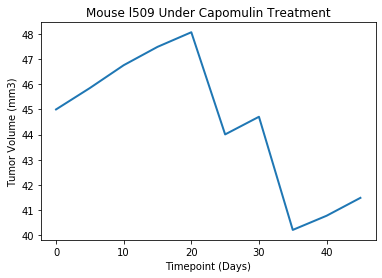

In [12]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#find the mouse l509 and get data
find_l509 = Cap_reg.loc[Cap_reg['Mouse ID'] == 'l509',:]

#set x and y axis from mouse l509
x_axis = find_l509['Timepoint']
y_axis = find_l509['Tumor Volume (mm3)']

#set plot points and plot the line
plt.title('Mouse l509 Under Capomulin Treatment')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_axis, y_axis, linewidth = 2, markersize = 12)


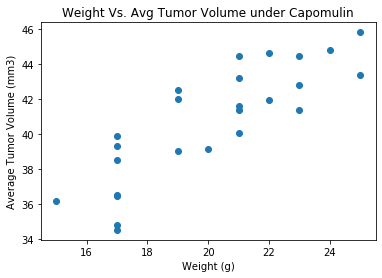

In [13]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#get the average for x and y axis
Cap_avg = Cap_reg.groupby('Mouse ID').mean()
x_axis = Cap_avg['Weight (g)']
y_axis = Cap_avg['Tumor Volume (mm3)']

#Set plot points and plot the scatter
plt.title('Weight Vs. Avg Tumor Volume under Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(x_axis,y_axis)


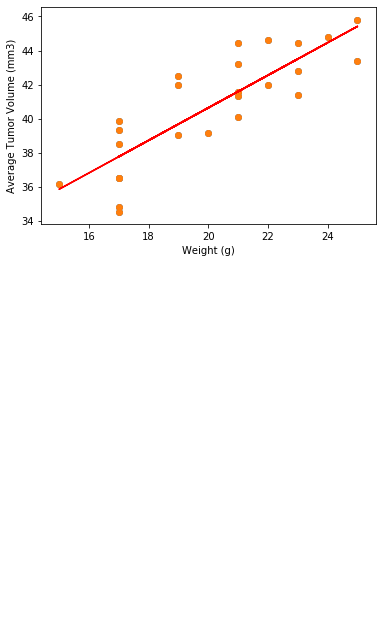

In [27]:
# Calculate the correlation coefficient and linear regression model for mouse weight 
# and average tumor volume for the Capomulin regimen
#import linregress module
from scipy.stats import linregress

#Calculate Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Set plot points and plot Scatter 
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.scatter(x_axis,y_axis)